In [7]:
import pandas as pd

# Load the dataset
file_path = '/Users/karanpareek/Desktop/day 4/student_health_data 2.csv'
data = pd.read_csv(file_path)

# Standardize column names
data.columns = data.columns.str.strip().str.replace(" ", "_").str.lower()

# Remove duplicates
data = data.drop_duplicates()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 student_id                  0
age                         0
gender                      0
heart_rate                  0
blood_pressure_systolic     0
blood_pressure_diastolic    0
stress_level_biosensor      0
stress_level_self_report    0
physical_activity           0
sleep_quality               0
mood                        0
study_hours                 0
project_hours               0
health_risk_level           0
dtype: int64


In [13]:
import pandas as pd

# Specify the correct file path
file_path = '/Users/karanpareek/Desktop/day 4/student_health_data 2.csv'

df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   Student_ID  Age Gender  Heart_Rate  Blood_Pressure_Systolic  \
0           1   24      M   50.663217               122.173015   
1           2   21      F   57.926042               110.778407   
2           3   22      M   59.294219               109.375673   
3           4   24      M   76.826232               125.142227   
4           5   20      M   68.342769               107.515592   

   Blood_Pressure_Diastolic  Stress_Level_Biosensor  Stress_Level_Self_Report  \
0                 84.419860                3.137350                  9.028669   
1                 75.696145                3.699078                  5.819697   
2                 83.803814                6.785156                  5.892360   
3                 78.091587                6.408509                  6.884001   
4                 80.674937                7.264719                  4.483450   

  Physical_Activity Sleep_Quality      Mood  Study_Hours  Project_Hours  \
0              High      Moderate     Hap

In [15]:
# Summary statistics
df.describe()

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


/var/folders/cv/v8fkwpls10v3gckcjc96j7gw0000gn/T/ipykernel_16846/3961660503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Health_Risk_Level', palette='viridis')


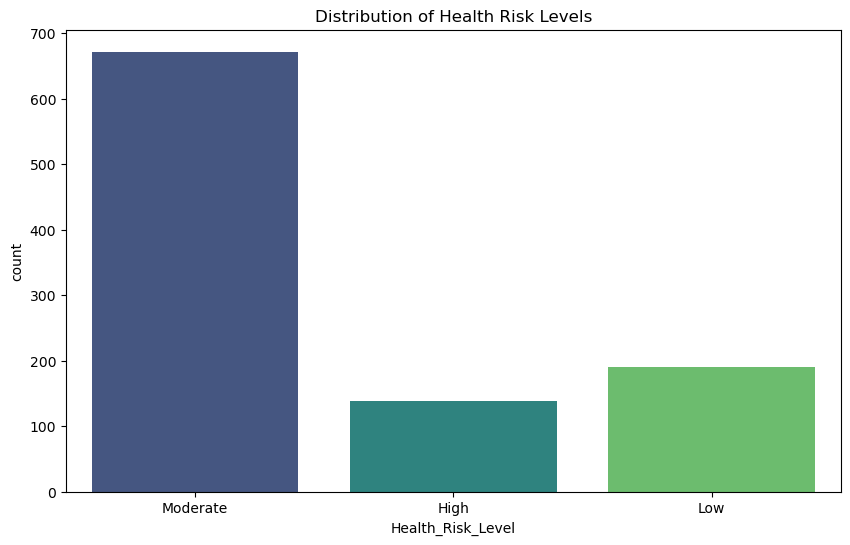

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns  # Required for the seaborn countplot

# Distribution of Health Risk Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Health_Risk_Level', palette='viridis')
plt.title('Distribution of Health Risk Levels')
plt.show()


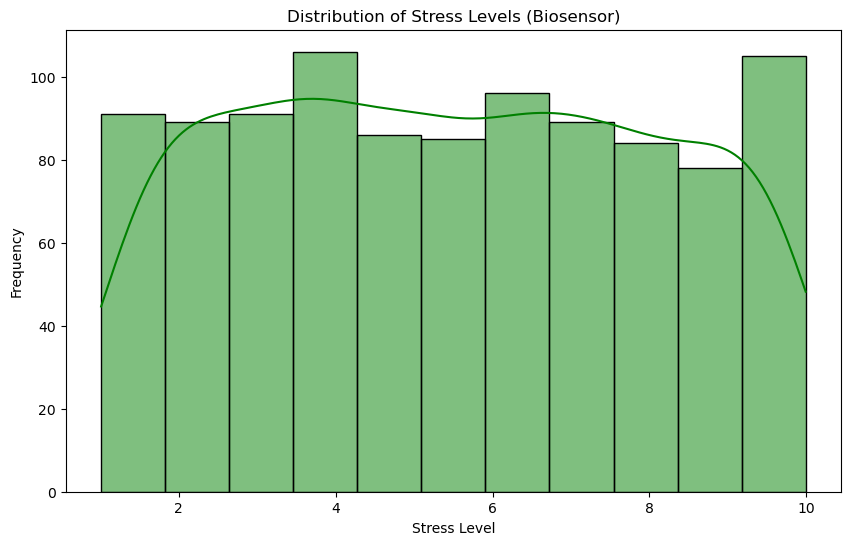

In [21]:
# Distribution of Stress Levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Stress_Level_Biosensor'], kde=True, color='green')
plt.title('Distribution of Stress Levels (Biosensor)')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

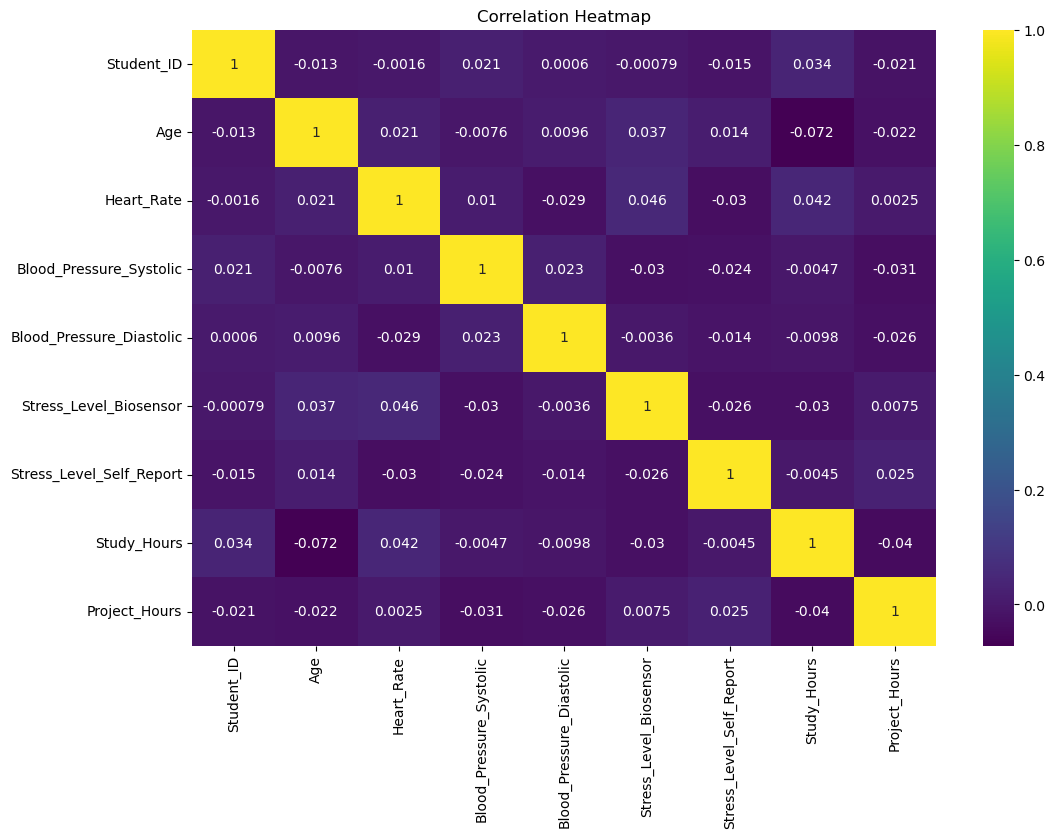

In [25]:
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and cleaned
numeric_df = df.select_dtypes(include=[np.number])  # Select numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = numeric_df.drop('Student_ID', axis=1)
y = df['Health_Risk_Level']

# Encode target variable
y_encoded = pd.factorize(y)[0]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.92,
 '              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95       121\n           1       1.00      0.56      0.72        32\n           2       0.94      0.96      0.95        47\n\n    accuracy                           0.92       200\n   macro avg       0.95      0.84      0.87       200\nweighted avg       0.93      0.92      0.91       200\n')